# Imports

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns


# Reading and processing data


In [11]:
income_data = pd.read_csv("adult.csv", na_values="?")

In [12]:
# income_data.describe()
income_data.info()
# income_data.columns = range(len(income_data.columns))

# income_data = income_data.dropna()
# income_data.info()

income_data.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imputer.fit(income_data)
income_data = imputer.transform(income_data)


In [14]:
income_data = pd.DataFrame(income_data)
income_data.info()
income_data.head(15)
# income_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  object
 1   1       32561 non-null  object
 2   2       32561 non-null  object
 3   3       32561 non-null  object
 4   4       32561 non-null  object
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  object
 11  11      32561 non-null  object
 12  12      32561 non-null  object
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [15]:
le1 = LabelEncoder()
le3 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le13 = LabelEncoder()
target_label_encoder = LabelEncoder()


income_data[1] = le1.fit_transform(income_data[1])
income_data[3] = le1.fit_transform(income_data[3])
income_data[5] = le1.fit_transform(income_data[5])
income_data[6] = le1.fit_transform(income_data[6])
income_data[7] = le1.fit_transform(income_data[7])
income_data[8] = le1.fit_transform(income_data[8])
income_data[9] = le1.fit_transform(income_data[9])
income_data[13] = le1.fit_transform(income_data[13])
income_data[14] = target_label_encoder.fit_transform(income_data[14])


In [16]:
income_data.head(15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,150601,0,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,88638,10,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
9,41,3,70037,15,10,4,2,4,4,1,0,3004,60,38,1


In [17]:
sc = StandardScaler()
income_data.iloc[:,0:14] = sc.fit_transform(income_data.iloc[:,0:14])

/tmp/ipykernel_12329/3487410370.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.08529633 -0.08529633 -0.08529633 ... -0.08529633 -0.08529633
 -0.08529633]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  income_data.iloc[:,0:14] = sc.fit_transform(income_data.iloc[:,0:14])
/tmp/ipykernel_12329/3487410370.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.18133163 0.18133163 1.21486874 ... 0.18133163 0.18133163 0.18133163]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  income_data.iloc[:,0:14] = sc.fit_transform(income_data.iloc[:,0:14])
/tmp/ipykernel_12329/3487410370.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.24948009  2.24948009  2.24948009 ... -0.4062122   2.24948

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(income_data.iloc[:,0:14], np.array(income_data[14]), test_size=0.2, shuffle=True)

model = LogisticRegression()
print(X_train.shape, Y_train.shape)
model.fit(X_train, Y_train)

(26048, 14) (26048,)


LogisticRegression()

Accuracy: 0.8220482112697681


<Axes: >

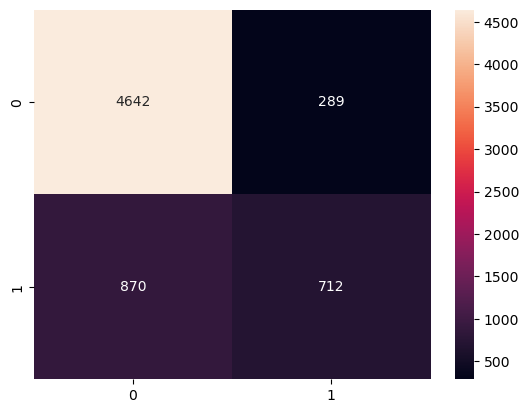

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = model.predict(X_test)
score = accuracy_score(Y_test, predictions)
cm = confusion_matrix(Y_test, predictions)
print("Accuracy:", score)
sns.heatmap(cm, annot=True, fmt="d")